In [323]:
import os
import pandas as pd
import numpy as np
from GoogleNews import GoogleNews
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from os import path
from nltk.corpus import stopwords
from textblob import TextBlob
import statsmodels.api as sm
from scipy import stats
from nltk.probability import FreqDist
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In order to extract articles I'm going to use a library called GoogleNews
https://pypi.org/project/GoogleNews/

license here:
https://github.com/Iceloof/GoogleNews/blob/master/LICENSE

In [212]:
dict_time = {'06/01/2020' : '12/31/2020',
             '06/01/2021' : '12/31/2021',
             '06/01/2022' : '12/31/2022',
             '06/01/2023' : '12/31/2023',
             '06/01/2019' : '12/31/2019',
             '06/01/2018' : '12/31/2018',
             '06/01/2017' : '12/31/2017',
             '06/01/2016' : '12/31/2016',
             '06/01/2015' : '12/31/2015',
             '06/01/2014' : '12/31/2014',
             '01/01/2020' : '06/01/2020',
             '01/01/2021' : '06/01/2021',
             '01/01/2022' : '06/01/2022',
             '01/01/2023' : '06/01/2023',
             '01/01/2019' : '06/01/2019',
             '01/01/2018' : '06/01/2018',
             '01/01/2017' : '06/01/2017',
             '01/01/2016' : '06/01/2016',
             '01/01/2015' : '06/01/2015',
             '01/01/2014' : '06/01/2014'}

def search_gn(s):
  df_final = pd.DataFrame()
  for x in dict_time:
    googlenews = GoogleNews(start=x,end=dict_time[x])
    googlenews.get_news(s)
    googlenews.enableException(True)
    result_FINAL = googlenews.result(sort=True)
    df_n = pd.DataFrame(result_FINAL)
    df_n['year'] = dict_time[x]
    df_n['year']= df_n['year'].str[-4:]
    df_final = df_final.append(df_n)
    
  return df_final

In [213]:
Ireland = search_gn('Housing Ireland') 
Uk = search_gn('Housing UK') 
USA = search_gn('Housing USA') 

In [224]:
Ireland = Ireland.drop_duplicates()
Uk = Uk.drop_duplicates()
USA = USA.drop_duplicates()

Ireland['Country'] = 'Eire'
Uk['Country'] = 'UK'
USA['Country'] = 'USA'

In [238]:
frames = [Ireland,USA,Uk]
Headlines = pd.concat(frames)
Headlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4160 entries, 0 to 85
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     4160 non-null   object        
 1   desc      0 non-null      object        
 2   date      4160 non-null   object        
 3   datetime  4160 non-null   datetime64[ns]
 4   link      4160 non-null   object        
 5   img       4160 non-null   object        
 6   media     4160 non-null   object        
 7   site      0 non-null      object        
 8   year      4160 non-null   object        
 9   Country   4160 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 357.5+ KB


In [239]:
Headlines.head()

,title,desc,date,datetime,link,img,media,site,year,Country
0,Oliver Mangan: Sweet spot means we can tackle ...,None,55 minutes ago,2023-05-01 13:49:33.360467,news.google.com/./articles/CBMiQWh0dHBzOi8vd3d...,https://lh3.googleusercontent.com/pZ5_jocQtI4K...,Irish Examiner,None,2020,Eire
1,Ciarán Nugent: Young people have good reason t...,None,1 hour ago,2023-05-01 13:44:33.362777,news.google.com/./articles/CBMiQWh0dHBzOi8vd3d...,https://lh3.googleusercontent.com/pZ5_jocQtI4K...,Irish Examiner,None,2020,Eire
2,FactFind: Was the 2008 crash caused by buildin...,None,1 hour ago,2023-05-01 13:44:33.357467,news.google.com/./articles/CBMiVmh0dHBzOi8vd3d...,https://lh3.googleusercontent.com/qgMy3IS7uLh6...,TheJournal.ie,None,2020,Eire
3,Ireland: Teaching by example: housing your emp...,None,4 hours ago,2023-05-01 10:44:33.363776,news.google.com/./articles/CBMiiwFodHRwczovL3d...,https://lh3.googleusercontent.com/nzOrQvRJTDSm...,Aspen Daily News,None,2020,Eire
4,Nursing is in crisis – how can it be resolved?,None,12 hours ago,2023-05-01 02:44:33.370563,news.google.com/./articles/CBMiSGh0dHBzOi8vd3d...,https://lh3.googleusercontent.com/pZ5_jocQtI4K...,Irish Examiner,None,2020,Eire


In [240]:
headlines = Headlines[['title','media','year','Country']]
headlines.head()

,title,media,year,Country
0,Oliver Mangan: Sweet spot means we can tackle ...,Irish Examiner,2020,Eire
1,Ciarán Nugent: Young people have good reason t...,Irish Examiner,2020,Eire
2,FactFind: Was the 2008 crash caused by buildin...,TheJournal.ie,2020,Eire
3,Ireland: Teaching by example: housing your emp...,Aspen Daily News,2020,Eire
4,Nursing is in crisis – how can it be resolved?,Irish Examiner,2020,Eire


In [241]:
headlines.isna().sum()

title      0
media      0
year       0
Country    0
dtype: int64

Text(0.5, 1.0, 'Number of articles by newspaper')

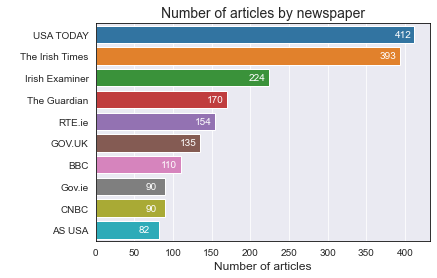

In [242]:
custom = {"axes.edgecolor": "black", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)
ax = sns.countplot(y=headlines["media"], order=headlines.media.value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0], padding=-20, color='white', fontsize=10)
headlines["media"].unique()
ax.set_xlabel("Number of articles",fontsize=12)
ax.set_ylabel(" ")
ax.set_title("Number of articles by newspaper",fontsize=14)

In [245]:
def sentiment_calc(text):
    try:
        return TextBlob(text).polarity  #there's also subjectivity if we want
    except:
        return None

headlines['polarity'] = headlines['title'].apply(sentiment_calc)

C:\Users\santi\AppData\Local\Temp/ipykernel_4056/2986002967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headlines['polarity'] = headlines['title'].apply(sentiment_calc)


In [246]:
headlines.head()

,title,media,year,Country,polarity
0,Oliver Mangan: Sweet spot means we can tackle ...,Irish Examiner,2020,Eire,0.35
1,Ciarán Nugent: Young people have good reason t...,Irish Examiner,2020,Eire,0.40
2,FactFind: Was the 2008 crash caused by buildin...,TheJournal.ie,2020,Eire,0.50
3,Ireland: Teaching by example: housing your emp...,Aspen Daily News,2020,Eire,0.00
4,Nursing is in crisis – how can it be resolved?,Irish Examiner,2020,Eire,0.00


<AxesSubplot:xlabel='Country', ylabel='polarity'>

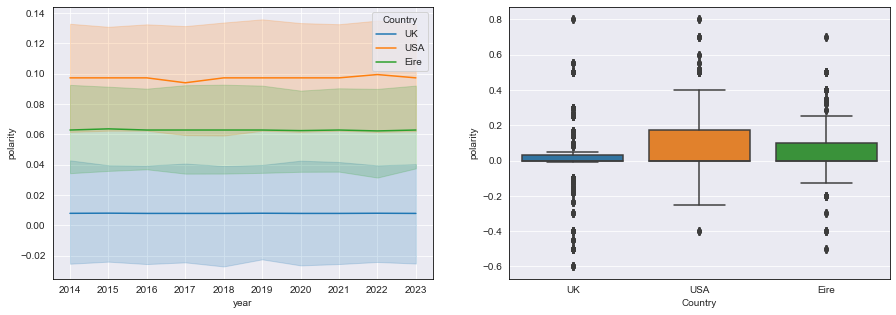

In [385]:
headlines = headlines.sort_values('year')
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.lineplot(data = headlines,x='year',y='polarity',hue='Country',ax=ax[0])
sns.boxplot(y= 'polarity',data=headlines,x='Country',ax=ax[1])

p value 0.0
stat value 0.8271624445915222


c:\Users\santi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


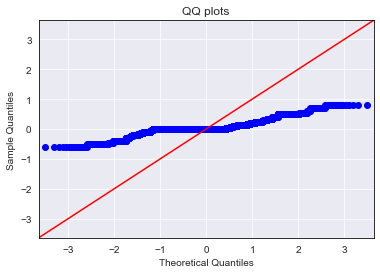

In [388]:
fig = sm.qqplot(headlines['polarity'], line='45')
plt.title('QQ plots')
stat, p = shapiro(headlines['polarity'])
print('p value ' + str(p))
print('stat value ' + str(stat))

In [273]:
a = headlines[headlines['Country']=='Eire']
b = headlines[headlines['Country']=='USA'] 
c = headlines[headlines['Country']=='UK']

stats.kruskal(a['polarity'],b['polarity'],c['polarity'])

KruskalResult(statistic=106.74867635505025, pvalue=6.604188403409497e-24)

In [319]:
import string
stopwords = set(stopwords.words("english"))
stopwords.add('housing')
stopwords.add('house')
stopwords.add('ireland')
stopwords.add('usa')
stopwords.add('uk')
stopwords.add('us')
stopwords.add(' ')
stopwords.add('')
stopwords.add('home')
stopwords.add('homes')
stopwords.add('irish')


In [320]:

def tk(x):
    text = x.str.cat(sep=' ')
    tokens = nltk.word_tokenize(text)
    tokens = [''.join(char for char in item if char not in string.punctuation) for item in tokens]
    tokens = [x.lower() for x in tokens]
    filtered_token = []
    for w in tokens:
        if w not in stopwords:
          filtered_token.append(w)
    return filtered_token

eire = tk(a['title'])
USA = tk(b['title'])
uk = tk(c['title'])


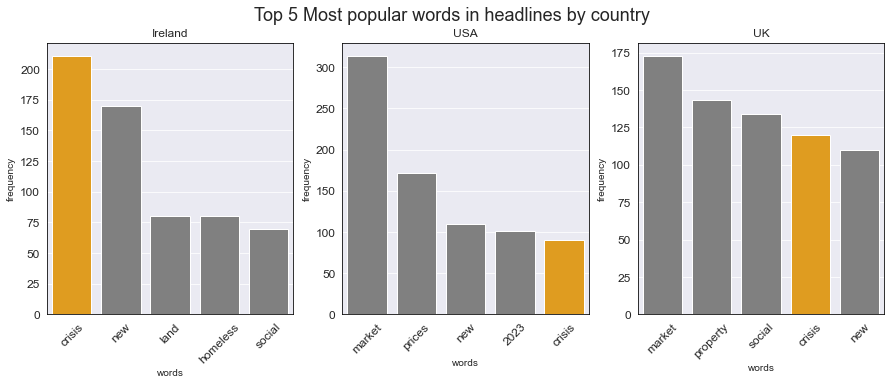

In [391]:
from collections import Counter
fig, ax = plt.subplots(1,3,figsize=(15, 5))
fig.suptitle('Top 5 Most popular words in headlines by country',fontsize=18)
a = Counter(eire)
a = pd.DataFrame.from_dict(a, orient='index').reset_index()
sns.barplot(y=0 ,x='index',data=a.nlargest(5, 0), ax=ax[0], palette= ['gray' if word != 'crisis' else 'orange' for word in a.nlargest(5, 0)['index']])
ax[0].set_title('Ireland')
ax[0].set(xlabel='words', ylabel='frequency')
ax[0].tick_params(axis='x',labelrotation=45, labelsize=12)
ax[0].tick_params(labelsize=12)
a = Counter(USA)
a = pd.DataFrame.from_dict(a, orient='index').reset_index()
sns.barplot(y=0,x='index',data=a.nlargest(5, 0),ax=ax[1], palette= ['gray' if word != 'crisis' else 'orange' for word in a.nlargest(5, 0)['index']])
ax[1].set_title('USA')
ax[1].set(xlabel='words', ylabel='frequency')
ax[1].tick_params(axis='x',labelrotation=45,labelsize=12)
ax[1].tick_params(labelsize=12)
a = Counter(uk)
a = pd.DataFrame.from_dict(a, orient='index').reset_index()
sns.barplot(y=0,x='index',data=a.nlargest(5, 0), ax=ax[2], palette= ['gray' if word != 'crisis' else 'orange' for word in a.nlargest(5, 0)['index']])
ax[2].set_title('UK')
ax[2].set(xlabel='words', ylabel='frequency')
ax[2].tick_params(axis='x',labelrotation=45,labelsize=12)
ax[2].tick_params(labelsize=12)


In [ ]:
import plotly.express as px 